# Exploratory Financial Data Analysis 

Data analysis of stock prices. 
____
We'll focus on healthcare stocks and see how they progressed throughout the current epidemic.

## Get the Data

I use pandas to directly read data from Tiingo, an API that allows us to read stock info directly from internet.


In [24]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

Gettin stock information for the following enterprises:
* Biogen Inc.
* Alexion Pharmaceuticals Inc.
* Boston Scientific Corp.
* Edwards Lifesciences Corp.
* Gilead Sciences Inc.


Stock data from Jan 1st 2019 to Apr 30th 2020 for each of these enterprises. 

In [7]:
import tiingo

In [13]:
TIINGO_API_KEY = 'e952ff3f89e764cb5cb4465adaf11f31a663a792'

In [14]:
from tiingo import TiingoClient

config = {
    'api_key': TIINGO_API_KEY,
    'session': True 
}

client = TiingoClient(config)

In [15]:
ALXN = client.get_dataframe("ALXN",
                                         startDate='2019-01-01',
                                         endDate='2020-04-30',
                                         frequency='daily')

In [16]:
ALXN.head(5)

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2019-01-02 00:00:00+00:00,98.05,99.0542,95.16,95.84,1359749,98.05,99.0542,95.16,95.84,1359749,0.0,1.0
2019-01-03 00:00:00+00:00,100.21,103.8800,99.12,100.15,3296547,100.21,103.8800,99.12,100.15,3296547,0.0,1.0
2019-01-04 00:00:00+00:00,106.00,107.3000,101.80,101.88,2349942,106.00,107.3000,101.80,101.88,2349942,0.0,1.0
2019-01-07 00:00:00+00:00,107.94,108.9800,104.70,105.65,1983675,107.94,108.9800,104.70,105.65,1983675,0.0,1.0
2019-01-08 00:00:00+00:00,108.61,110.4900,105.20,108.65,1766466,108.61,110.4900,105.20,108.65,1766466,0.0,1.0


In [17]:
BIIB = client.get_dataframe("BIIB",
                                         startDate='2019-01-01',
                                         endDate='2020-04-30',
                                         frequency='daily')

In [18]:
BIIB.head(5)

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2019-01-02 00:00:00+00:00,304.69,307.13,296.54,296.84,1336591,304.69,307.13,296.54,296.84,1336591,0.0,1.0
2019-01-03 00:00:00+00:00,307.00,316.69,305.92,306.76,2148636,307.00,316.69,305.92,306.76,2148636,0.0,1.0
2019-01-04 00:00:00+00:00,318.33,323.63,309.90,311.80,1532580,318.33,323.63,309.90,311.80,1532580,0.0,1.0
2019-01-07 00:00:00+00:00,322.40,327.26,317.41,319.28,1316546,322.40,327.26,317.41,319.28,1316546,0.0,1.0
2019-01-08 00:00:00+00:00,324.44,325.90,320.47,324.53,1008127,324.44,325.90,320.47,324.53,1008127,0.0,1.0


In [19]:
BSX = client.get_dataframe("BSX",
                                         startDate='2019-01-01',
                                         endDate='2020-04-30',
                                         frequency='daily')

In [20]:
EW = client.get_dataframe("EW",
                                         startDate='2019-01-01',
                                         endDate='2020-04-30',
                                         frequency='daily')

In [21]:
GILD = client.get_dataframe("GILD",
                                         startDate='2019-01-01',
                                         endDate='2020-04-30',
                                         frequency='daily')

In [22]:
tickers=['ALXN','BIIB','BSX','EW','GILD']
tickers

['ALXN', 'BIIB', 'BSX', 'EW', 'GILD']

Making a single dataframe together to a single data frame. 

In [25]:
stocks=pd.concat([ALXN,BIIB,BSX,EW,GILD],axis=1, keys=tickers)

In [26]:
stocks.head()

ALXN                                              \
                            close      high     low    open   volume adjClose   
date                                                                            
2019-01-02 00:00:00+00:00   98.05   99.0542   95.16   95.84  1359749    98.05   
2019-01-03 00:00:00+00:00  100.21  103.8800   99.12  100.15  3296547   100.21   
2019-01-04 00:00:00+00:00  106.00  107.3000  101.80  101.88  2349942   106.00   
2019-01-07 00:00:00+00:00  107.94  108.9800  104.70  105.65  1983675   107.94   
2019-01-08 00:00:00+00:00  108.61  110.4900  105.20  108.65  1766466   108.61   

                                                               ...   GILD  \
                            adjHigh  adjLow adjOpen adjVolume  ...    low   
date                                                           ...          
2019-01-02 00:00:00+00:00   99.0542   95.16   95.84   1359749  ...  61.50   
2019-01-03 00:00:00+00:00  103.8800   99.12  100.15   3296547  ...  65.14   
2019-01-04 00:00:00+00:00  107.3000  101.80  101.88   2349942  ...  66.04   
2019-01-07 00:00:00+00:00  108.9800  104.70  105.65   1983675  ...  67.37   
2019-01-08 00:00:00+00:00  110.4900  105.20  108.65   1766466  ...  67.09   

                                                                             \
                            open    volume   adjClose    adjHigh     adjLow   
date                                                                          
2019-01-02 00:00:00+00:00  61.76   7839436  60.489490  61.032980  58.639717   
2019-01-03 00:00:00+00:00  66.29  14631335  62.215309  64.122292  62.110425   
2019-01-04 00:00:00+00:00  66.25   9639546  65.075783  65.242644  62.968567   
2019-01-07 00:00:00+00:00  68.10  10504091  65.371366  65.719390  64.236711   
2019-01-08 00:00:00+00:00  68.85   7527385  64.923225  65.933925  63.969733   

                                                                    
                             adjOpen adjVolume divCash splitFactor  
date                                                                
2019-01-02 00:00:00+00:00  58.887625   7839436     0.0         1.0  
2019-01-03 00:00:00+00:00  63.206940  14631335     0.0         1.0  
2019-01-04 00:00:00+00:00  63.168801   9639546     0.0         1.0  
2019-01-07 00:00:00+00:00  64.932760  10504091     0.0         1.0  
2019-01-08 00:00:00+00:00  65.647878   7527385     0.0         1.0  

[5 rows x 60 columns]

In [27]:
stocks.columns.names = ['Ticker','Stock Info']

In [28]:
stocks.head()

Ticker                       ALXN                                              \
Stock Info                  close      high     low    open   volume adjClose   
date                                                                            
2019-01-02 00:00:00+00:00   98.05   99.0542   95.16   95.84  1359749    98.05   
2019-01-03 00:00:00+00:00  100.21  103.8800   99.12  100.15  3296547   100.21   
2019-01-04 00:00:00+00:00  106.00  107.3000  101.80  101.88  2349942   106.00   
2019-01-07 00:00:00+00:00  107.94  108.9800  104.70  105.65  1983675   107.94   
2019-01-08 00:00:00+00:00  108.61  110.4900  105.20  108.65  1766466   108.61   

Ticker                                                         ...   GILD  \
Stock Info                  adjHigh  adjLow adjOpen adjVolume  ...    low   
date                                                           ...          
2019-01-02 00:00:00+00:00   99.0542   95.16   95.84   1359749  ...  61.50   
2019-01-03 00:00:00+00:00  103.8800   99.12  100.15   3296547  ...  65.14   
2019-01-04 00:00:00+00:00  107.3000  101.80  101.88   2349942  ...  66.04   
2019-01-07 00:00:00+00:00  108.9800  104.70  105.65   1983675  ...  67.37   
2019-01-08 00:00:00+00:00  110.4900  105.20  108.65   1766466  ...  67.09   

Ticker                                                                       \
Stock Info                  open    volume   adjClose    adjHigh     adjLow   
date                                                                          
2019-01-02 00:00:00+00:00  61.76   7839436  60.489490  61.032980  58.639717   
2019-01-03 00:00:00+00:00  66.29  14631335  62.215309  64.122292  62.110425   
2019-01-04 00:00:00+00:00  66.25   9639546  65.075783  65.242644  62.968567   
2019-01-07 00:00:00+00:00  68.10  10504091  65.371366  65.719390  64.236711   
2019-01-08 00:00:00+00:00  68.85   7527385  64.923225  65.933925  63.969733   

Ticker                                                              
Stock Info                   adjOpen adjVolume divCash splitFactor  
date                                                                
2019-01-02 00:00:00+00:00  58.887625   7839436     0.0         1.0  
2019-01-03 00:00:00+00:00  63.206940  14631335     0.0         1.0  
2019-01-04 00:00:00+00:00  63.168801   9639546     0.0         1.0  
2019-01-07 00:00:00+00:00  64.932760  10504091     0.0         1.0  
2019-01-08 00:00:00+00:00  65.647878   7527385     0.0         1.0  

[5 rows x 60 columns]

** Create a returns DF.

In [29]:
returns = pd.DataFrame()

In [30]:
for tick in tickers:
    returns[tick+' Return']=stocks[tick]['close'].pct_change()

In [31]:
returns.head()

,ALXN Return,BIIB Return,BSX Return,EW Return,GILD Return
date,,,,,
2019-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2019-01-03 00:00:00+00:00,0.022030,0.007581,-0.044980,-0.037389,0.028531
2019-01-04 00:00:00+00:00,0.057779,0.036906,0.039502,0.035222,0.045977
2019-01-07 00:00:00+00:00,0.018302,0.012785,0.006139,0.006859,0.004542
2019-01-08 00:00:00+00:00,0.006207,0.006328,0.027891,0.019167,-0.006855


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

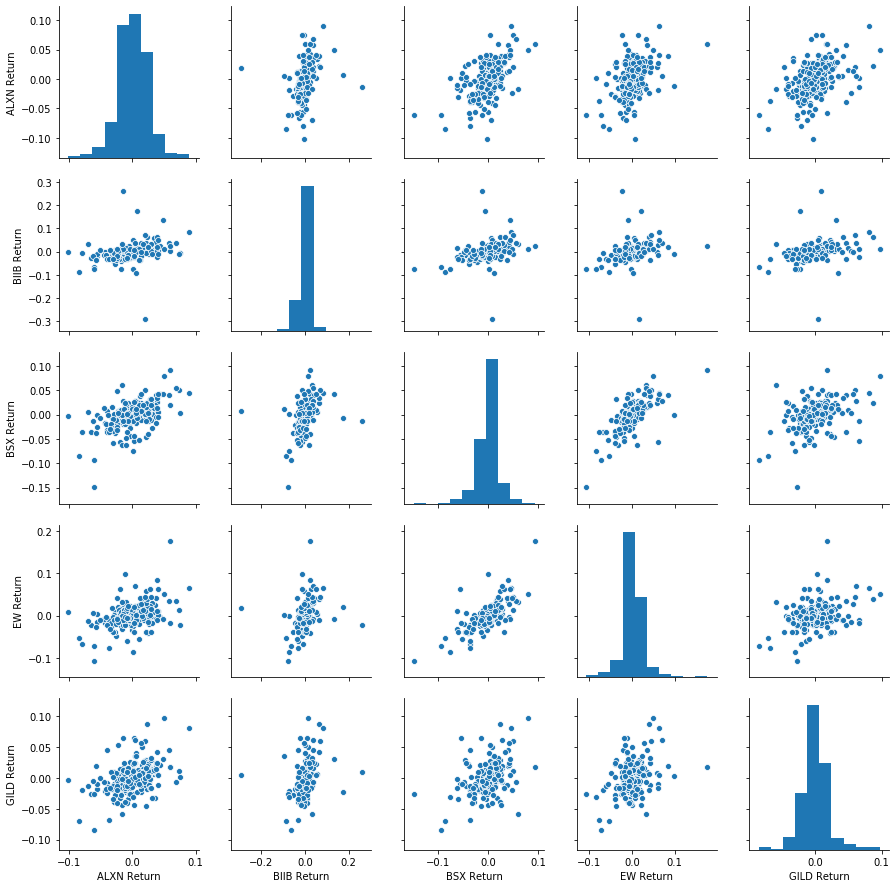

In [32]:
sns.pairplot(returns[1:])

In [34]:
returns.idxmax()

ALXN Return   2020-03-17 00:00:00+00:00
BIIB Return   2019-10-22 00:00:00+00:00
BSX Return    2020-03-24 00:00:00+00:00
EW Return     2020-03-24 00:00:00+00:00
GILD Return   2020-04-17 00:00:00+00:00
dtype: datetime64[ns, UTC]

____
# More Visualization


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

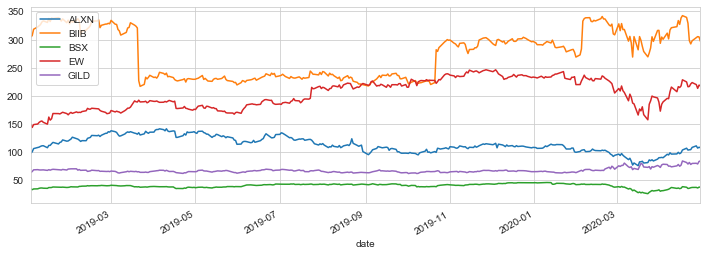

In [36]:
for tick in tickers:
    stocks[tick]['close'].plot(label=tick,figsize=(12,4))
plt.legend()

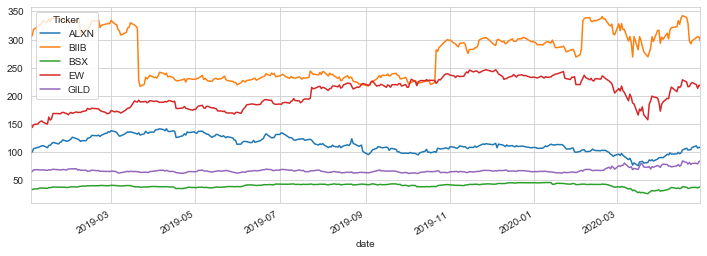

In [37]:
stocks.xs(key='close',axis=1,level='Stock Info').plot(figsize=(12,4))

## Correlations

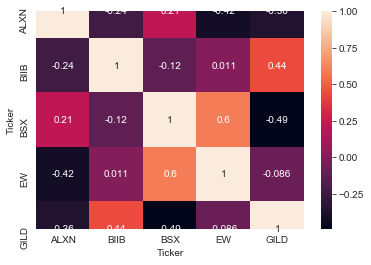

In [38]:
sns.heatmap(stocks.xs(key='close',axis=1, level='Stock Info').corr(), annot=True)